## Exploratory Data Analysis (EDA)

In this step of the project, we explored the structure, patterns, and trends within the M5 dataset to guide feature engineering and modeling.

In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()
%matplotlib inline

In [30]:
# load data
df = pd.read_csv("../data/processed/sales_merged.csv")

# make sure date is in datetime format
df["date"] = pd.to_datetime(df["date"])

df.head()

,id,item_id,dept_id,store_id,cat_id,state_id,d,sales,date,wm_yr_wk,...,month,year,event_name_1,event_type_1,event_name_2,event_type_2,snap_CA,snap_TX,snap_WI,sell_price
0,FOODS_1_001_CA_1_validation,FOODS_1_001,FOODS_1,CA_1,FOODS,CA,d_1,3,2011-01-29,11101,...,1,2011,NaN,NaN,NaN,NaN,0,0,0,2.0
1,FOODS_1_001_CA_1_validation,FOODS_1_001,FOODS_1,CA_1,FOODS,CA,d_2,0,2011-01-30,11101,...,1,2011,NaN,NaN,NaN,NaN,0,0,0,2.0
2,FOODS_1_001_CA_1_validation,FOODS_1_001,FOODS_1,CA_1,FOODS,CA,d_3,0,2011-01-31,11101,...,1,2011,NaN,NaN,NaN,NaN,0,0,0,2.0
3,FOODS_1_001_CA_1_validation,FOODS_1_001,FOODS_1,CA_1,FOODS,CA,d_4,1,2011-02-01,11101,...,2,2011,NaN,NaN,NaN,NaN,1,1,0,2.0
4,FOODS_1_001_CA_1_validation,FOODS_1_001,FOODS_1,CA_1,FOODS,CA,d_5,4,2011-02-02,11101,...,2,2011,NaN,NaN,NaN,NaN,1,0,1,2.0


In [31]:
# get overview of the data
print("shape: ", df.shape)
print("\ncolumns:\n", df.columns.tolist())
print("\nmissing values:\n", df.isna().sum())
df.describe(include="all")

shape:  (46027957, 22)

columns:
 ['id', 'item_id', 'dept_id', 'store_id', 'cat_id', 'state_id', 'd', 'sales', 'date', 'wm_yr_wk', 'weekday', 'wday', 'month', 'year', 'event_name_1', 'event_type_1', 'event_name_2', 'event_type_2', 'snap_CA', 'snap_TX', 'snap_WI', 'sell_price']

missing values:
 id                     0
item_id                0
dept_id                0
store_id               0
cat_id                 0
state_id               0
d                      0
sales                  0
date                   0
wm_yr_wk               0
weekday                0
wday                   0
month                  0
year                   0
event_name_1    42341567
event_type_1    42341567
event_name_2    45933474
event_type_2    45933474
snap_CA                0
snap_TX                0
snap_WI                0
sell_price             0
dtype: int64


,id,item_id,dept_id,store_id,cat_id,state_id,d,sales,date,wm_yr_wk,...,month,year,event_name_1,event_type_1,event_name_2,event_type_2,snap_CA,snap_TX,snap_WI,sell_price
count,46027957,46027957,46027957,46027957,46027957,46027957,46027957,4.602796e+07,46027957,4.602796e+07,...,4.602796e+07,4.602796e+07,3686390,3686390,94483,94483,4.602796e+07,4.602796e+07,4.602796e+07,4.602796e+07
unique,30490,3049,7,10,3,3,1913,NaN,NaN,NaN,...,NaN,NaN,30,4,4,2,NaN,NaN,NaN,NaN
top,HOUSEHOLD_2_516_WI_3_validation,FOODS_1_006,FOODS_3,TX_2,FOODS,CA,d_1912,NaN,NaN,NaN,...,NaN,NaN,StPatricksDay,National,Father's day,Cultural,NaN,NaN,NaN,NaN
freq,1913,19130,12344860,4722509,21395953,18217798,30490,NaN,NaN,NaN,...,NaN,NaN,142824,1241227,28295,66784,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.427294e+00,2014-01-15 15:38:43.793646080,1.137348e+04,...,6.398704e+00,2.013552e+03,NaN,NaN,NaN,NaN,3.283675e-01,3.287932e-01,3.288327e-01,4.408089e+00
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000e+00,2011-01-29 00:00:00,1.110100e+04,...,1.000000e+00,2.011000e+03,NaN,NaN,NaN,NaN,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e-02
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000e+00,2012-11-23 00:00:00,1.124300e+04,...,3.000000e+00,2.012000e+03,NaN,NaN,NaN,NaN,0.000000e+00,0.000000e+00,0.000000e+00,2.180000e+00
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000e+00,2014-03-10 00:00:00,1.140600e+04,...,6.000000e+00,2.014000e+03,NaN,NaN,NaN,NaN,0.000000e+00,0.000000e+00,0.000000e+00,3.470000e+00
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000e+00,2015-04-12 00:00:00,1.151100e+04,...,9.000000e+00,2.015000e+03,NaN,NaN,NaN,NaN,1.000000e+00,1.000000e+00,1.000000e+00,5.840000e+00
max,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.630000e+02,2016-04-24 00:00:00,1.161300e+04,...,1.200000e+01,2.016000e+03,NaN,NaN,NaN,NaN,1.000000e+00,1.000000e+00,1.000000e+00,1.073200e+02


In [32]:
df['month'].unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12])

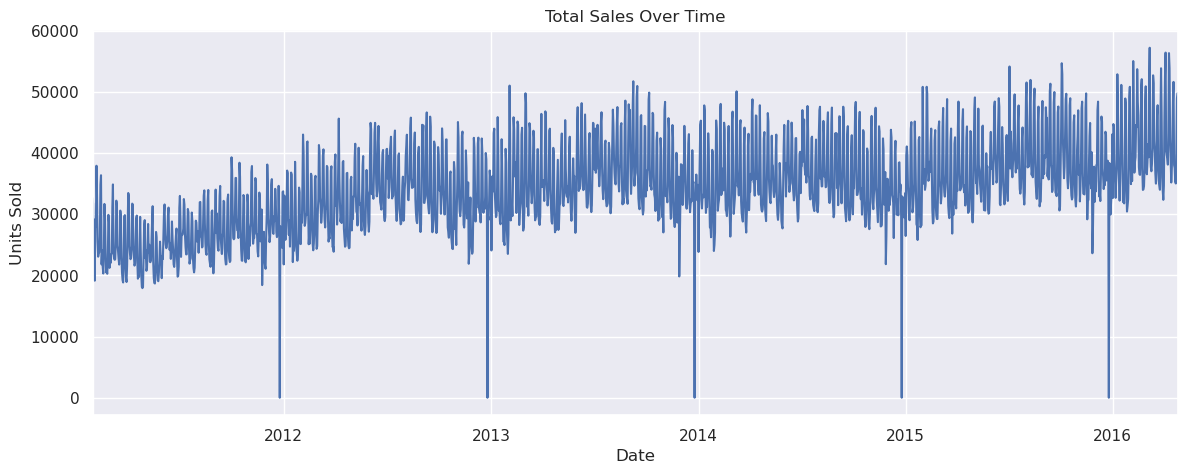

In [33]:
# 4. Sales Over Time
daily_sales = df.groupby("date")["sales"].sum()
daily_sales.plot(figsize=(14, 5), title="Total Sales Over Time")
plt.xlabel("Date")
plt.ylabel("Units Sold")
plt.show()

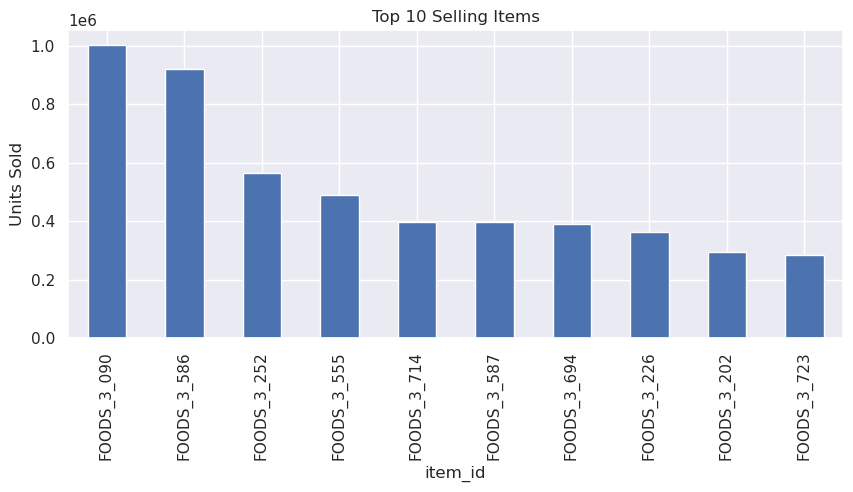

In [34]:
# 6. Top Departments and Items
top_items = df.groupby("item_id")["sales"].sum().sort_values(ascending=False).head(10)
top_items.plot(kind="bar", title="Top 10 Selling Items", figsize=(10, 4))
plt.ylabel("Units Sold")
plt.show()

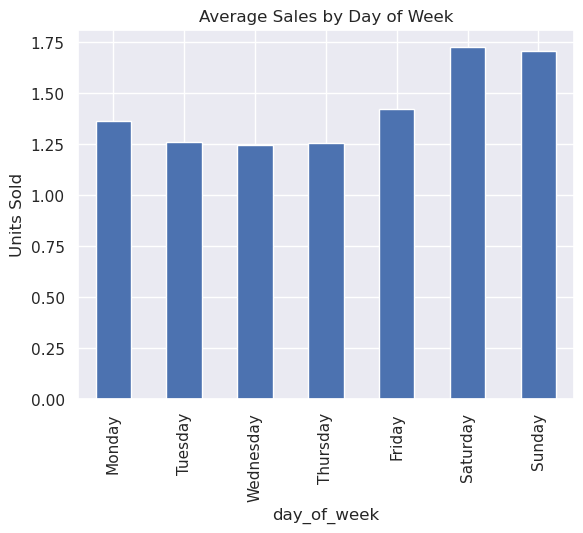

In [35]:
# 7. Sales by Day of Week
df["day_of_week"] = df["date"].dt.day_name()
dow_sales = df.groupby("day_of_week")["sales"].mean().reindex(
    ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
)
dow_sales.plot(kind="bar", title="Average Sales by Day of Week")
plt.ylabel("Units Sold")
plt.show()

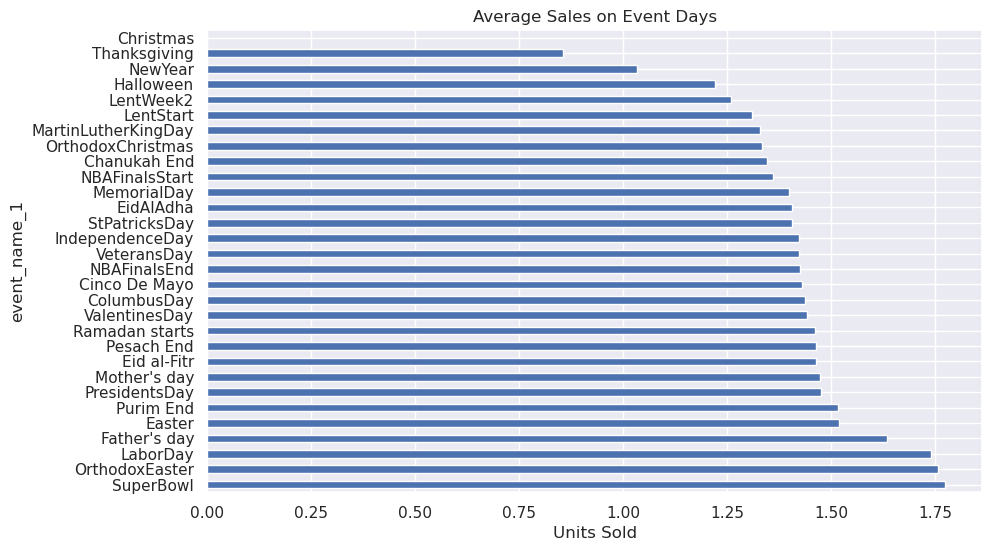

In [36]:
# 8. Holiday/Event Effects
event_sales = df[df["event_name_1"].notna()].groupby("event_name_1")["sales"].mean().sort_values(ascending=False)
event_sales.plot(kind="barh", title="Average Sales on Event Days", figsize=(10, 6))
plt.xlabel("Units Sold")
plt.show()

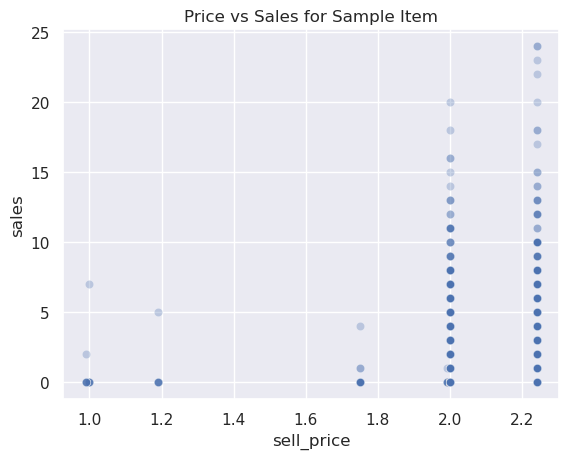

In [37]:
# 9. Price vs Sales (Elasticity)
sample_item = df[df["item_id"] == df["item_id"].unique()[0]]
sns.scatterplot(data=sample_item, x="sell_price", y="sales", alpha=0.3)
plt.title("Price vs Sales for Sample Item")
plt.show()

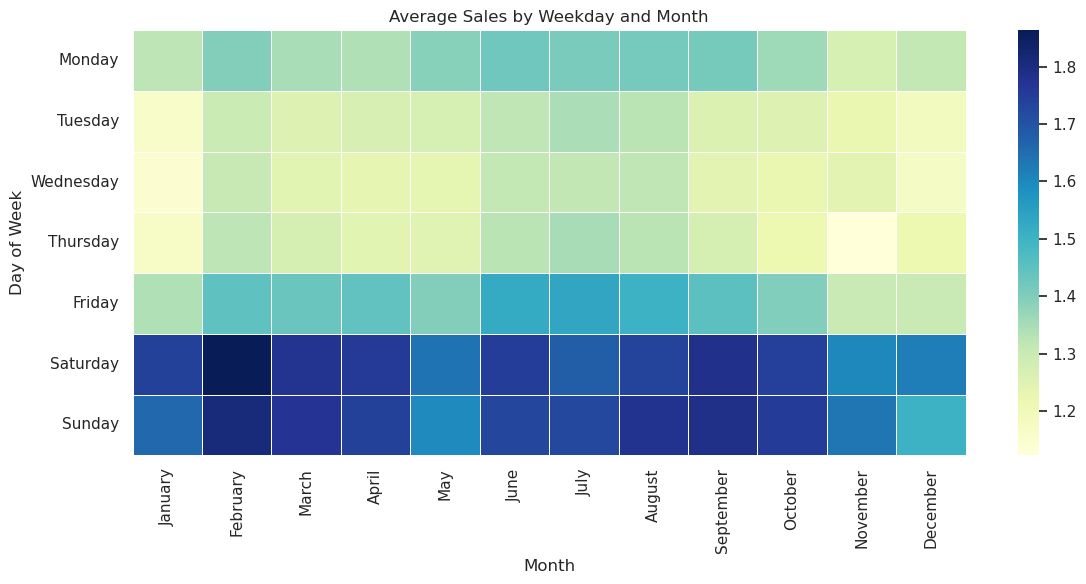

In [38]:
# Extract month and weekday
df["month"] = df["date"].dt.month_name()
df["weekday"] = df["date"].dt.day_name()

# Pivot table: average sales by weekday and month
pivot = df.pivot_table(
    index="weekday",
    columns="month",
    values="sales",
    aggfunc="mean"
)

# Reorder rows and columns for better visual flow
weekday_order = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
month_order = [
    "January", "February", "March", "April", "May", "June",
    "July", "August", "September", "October", "November", "December"
]

pivot = pivot.reindex(index=weekday_order, columns=month_order)

# Plot heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(pivot, annot=False, fmt=".0f", cmap="YlGnBu", linewidths=0.5)
plt.title("Average Sales by Weekday and Month")
plt.xlabel("Month")
plt.ylabel("Day of Week")
plt.tight_layout()
plt.show()